# Credit Card Fraud Exploration

This project will focus on credit card fraud activity.
Fraudulent detection is one of toughest challenges due to imbalanced data, irregular identifiable patterns, missing features, and live transactions. Creating a model with live streaming data, learn the live transaction data, update transaction pattern, and identify anomaly is pertinent in many areas. 

# Background: Business Objectives
It was reported that Federal Trade Commission received 2.8 million fraud reports from consumers in 2021. Consumers loss reached $5.8 billion which is 70% higher than 2020. Fraudsters are using more advanced techniques, such as machine learning, to target new customers, online transactions, and stealing identities. Currently, many models have been proposed to improve the fraud detection including KNN, logistic regression, SVM etc. For data preprocessing, data under-sampling, over-sampling, feature selection (PCA, logistic regression, SVM) have been widely used. There is report that credit card fraud detection recall can reach 0.94. However, based on the previous year’s report, fraudulent activities increase more and more. Fraudsters are using machine learning techniques to avoid defence machine learning algorithms. Simply label outliers or defining outliers are not satisfying the needs to identify attacking pattern. 
A platform that contains data streaming, data preprocessing (feature selection, auto-labeling, grouping), model selection, model training, model relearn based on live transaction data, and prediction is highly needed. The data-model live interaction will facilitate the model selection and updating, which will further enhance the anomaly detection speed.


# Part I. Data Exploration

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
filepath = "../Data/creditcard.csv"
df = pd.read_csv(filepath)

check the basic info of the dataset

In [3]:
df.head(5)

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 284807 entries, 0 to 284806
Data columns (total 31 columns):
 #   Column  Non-Null Count   Dtype  
---  ------  --------------   -----  
 0   Time    284807 non-null  float64
 1   V1      284807 non-null  float64
 2   V2      284807 non-null  float64
 3   V3      284807 non-null  float64
 4   V4      284807 non-null  float64
 5   V5      284807 non-null  float64
 6   V6      284807 non-null  float64
 7   V7      284807 non-null  float64
 8   V8      284807 non-null  float64
 9   V9      284807 non-null  float64
 10  V10     284807 non-null  float64
 11  V11     284807 non-null  float64
 12  V12     284807 non-null  float64
 13  V13     284807 non-null  float64
 14  V14     284807 non-null  float64
 15  V15     284807 non-null  float64
 16  V16     284807 non-null  float64
 17  V17     284807 non-null  float64
 18  V18     284807 non-null  float64
 19  V19     284807 non-null  float64
 20  V20     284807 non-null  float64
 21  V21     28

In [5]:
df.dtypes

Time      float64
V1        float64
V2        float64
V3        float64
V4        float64
V5        float64
V6        float64
V7        float64
V8        float64
V9        float64
V10       float64
V11       float64
V12       float64
V13       float64
V14       float64
V15       float64
V16       float64
V17       float64
V18       float64
V19       float64
V20       float64
V21       float64
V22       float64
V23       float64
V24       float64
V25       float64
V26       float64
V27       float64
V28       float64
Amount    float64
Class       int64
dtype: object

In [6]:
df.describe()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
count,284807.000000,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,...,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,284807.000000,284807.000000
mean,94813.859575,1.168375e-15,3.416908e-16,-1.379537e-15,2.074095e-15,9.604066e-16,1.487313e-15,-5.556467e-16,1.213481e-16,-2.406331e-15,...,1.654067e-16,-3.568593e-16,2.578648e-16,4.473266e-15,5.340915e-16,1.683437e-15,-3.660091e-16,-1.227390e-16,88.349619,0.001727
std,47488.145955,1.958696e+00,1.651309e+00,1.516255e+00,1.415869e+00,1.380247e+00,1.332271e+00,1.237094e+00,1.194353e+00,1.098632e+00,...,7.345240e-01,7.257016e-01,6.244603e-01,6.056471e-01,5.212781e-01,4.822270e-01,4.036325e-01,3.300833e-01,250.120109,0.041527
min,0.000000,-5.640751e+01,-7.271573e+01,-4.832559e+01,-5.683171e+00,-1.137433e+02,-2.616051e+01,-4.355724e+01,-7.321672e+01,-1.343407e+01,...,-3.483038e+01,-1.093314e+01,-4.480774e+01,-2.836627e+00,-1.029540e+01,-2.604551e+00,-2.256568e+01,-1.543008e+01,0.000000,0.000000
25%,54201.500000,-9.203734e-01,-5.985499e-01,-8.903648e-01,-8.486401e-01,-6.915971e-01,-7.682956e-01,-5.540759e-01,-2.086297e-01,-6.430976e-01,...,-2.283949e-01,-5.423504e-01,-1.618463e-01,-3.545861e-01,-3.171451e-01,-3.269839e-01,-7.083953e-02,-5.295979e-02,5.600000,0.000000
50%,84692.000000,1.810880e-02,6.548556e-02,1.798463e-01,-1.984653e-02,-5.433583e-02,-2.741871e-01,4.010308e-02,2.235804e-02,-5.142873e-02,...,-2.945017e-02,6.781943e-03,-1.119293e-02,4.097606e-02,1.659350e-02,-5.213911e-02,1.342146e-03,1.124383e-02,22.000000,0.000000
75%,139320.500000,1.315642e+00,8.037239e-01,1.027196e+00,7.433413e-01,6.119264e-01,3.985649e-01,5.704361e-01,3.273459e-01,5.971390e-01,...,1.863772e-01,5.285536e-01,1.476421e-01,4.395266e-01,3.507156e-01,2.409522e-01,9.104512e-02,7.827995e-02,77.165000,0.000000
max,172792.000000,2.454930e+00,2.205773e+01,9.382558e+00,1.687534e+01,3.480167e+01,7.330163e+01,1.205895e+02,2.000721e+01,1.559499e+01,...,2.720284e+01,1.050309e+01,2.252841e+01,4.584549e+00,7.519589e+00,3.517346e+00,3.161220e+01,3.384781e+01,25691.160000,1.000000


## I - A. Data wrangling
1. Are there any null values in the dataset?
### Impute data set.

## I - B. Imbalanced class handling
2. How many fraud transactions in the dataset? Imbalanced data handling.
### Use undersampling and oversampling techinique to handle the imbalanced dataset.

In [7]:
df.isna().sum()

Time      0
V1        0
V2        0
V3        0
V4        0
V5        0
V6        0
V7        0
V8        0
V9        0
V10       0
V11       0
V12       0
V13       0
V14       0
V15       0
V16       0
V17       0
V18       0
V19       0
V20       0
V21       0
V22       0
V23       0
V24       0
V25       0
V26       0
V27       0
V28       0
Amount    0
Class     0
dtype: int64

Good news! There are no null values in the data set.

In [8]:
# How many fraud transactions are there? Class ==1
fraud_sum = (df['Class']==1).sum()
all_sum = df.shape[0]

print("There are ", all_sum, "transactions, and ", fraud_sum, " fraud transactions")

There are  284807 transactions, and  492  fraud transactions


In [9]:
fraud = df.loc[df['Class']==1]
normal = df.loc[df['Class']==0]

In [10]:
fraud.head(5)

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
541,406.0,-2.312227,1.951992,-1.609851,3.997906,-0.522188,-1.426545,-2.537387,1.391657,-2.770089,...,0.517232,-0.035049,-0.465211,0.320198,0.044519,0.177840,0.261145,-0.143276,0.00,1
623,472.0,-3.043541,-3.157307,1.088463,2.288644,1.359805,-1.064823,0.325574,-0.067794,-0.270953,...,0.661696,0.435477,1.375966,-0.293803,0.279798,-0.145362,-0.252773,0.035764,529.00,1
4920,4462.0,-2.303350,1.759247,-0.359745,2.330243,-0.821628,-0.075788,0.562320,-0.399147,-0.238253,...,-0.294166,-0.932391,0.172726,-0.087330,-0.156114,-0.542628,0.039566,-0.153029,239.93,1
6108,6986.0,-4.397974,1.358367,-2.592844,2.679787,-1.128131,-1.706536,-3.496197,-0.248778,-0.247768,...,0.573574,0.176968,-0.436207,-0.053502,0.252405,-0.657488,-0.827136,0.849573,59.00,1
6329,7519.0,1.234235,3.019740,-4.304597,4.732795,3.624201,-1.357746,1.713445,-0.496358,-1.282858,...,-0.379068,-0.704181,-0.656805,-1.632653,1.488901,0.566797,-0.010016,0.146793,1.00,1


# Explore several questions:

### 1. What is the amount distribution of the fraud activities?

### 2. How fraud amount distribution correlated with all other normal transactions?

### 3. Any correlations among v1 to v27?

### 4. Time distribution for fraud and normal transactions.

Let's visualize all numerical features in both density plot and box plot. Note any observations.



                                 Numeric Features Distribution                                  


/var/folders/0z/5dyhp7xx5g700b6sqbzkl_fw0000gn/T/ipykernel_2371/1655962955.py:14: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df[external_factors[i]],
/var/folders/0z/5dyhp7xx5g700b6sqbzkl_fw0000gn/T/ipykernel_2371/1655962955.py:14: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df[external_fac

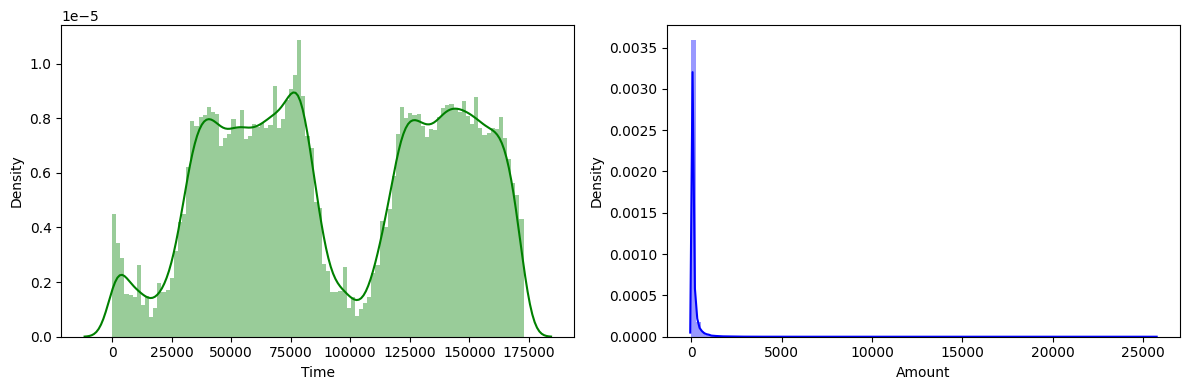

In [11]:
external_factors = ['Time','Amount']

print('\033[1mNumeric Features Distribution'.center(100))

figsize = (12, 4)

n=len(external_factors)
colors = ['g', 'b', 'r', 'y', 'k']

# histogram
plt.figure(figsize=figsize)
for i in range(len(external_factors)):
    plt.subplot(1,n,i+1)
    sns.distplot(df[external_factors[i]],
                 bins=100, 
                 color = colors[i])
plt.tight_layout();


                               Fraud Numeric Features Distribution                              


/var/folders/0z/5dyhp7xx5g700b6sqbzkl_fw0000gn/T/ipykernel_2371/1180880918.py:5: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(fraud[external_factors[i]],
/var/folders/0z/5dyhp7xx5g700b6sqbzkl_fw0000gn/T/ipykernel_2371/1180880918.py:5: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(fraud[external

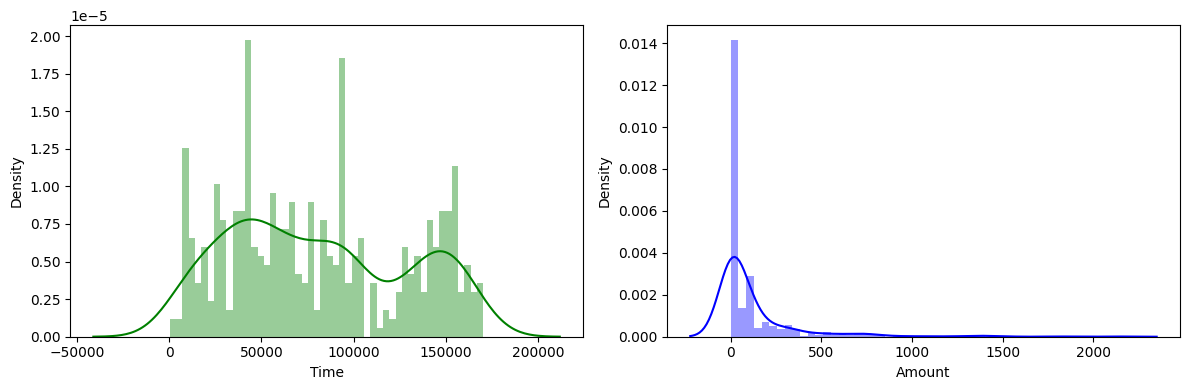

In [12]:
print('\033[1m Fraud Numeric Features Distribution'.center(100))
plt.figure(figsize=figsize)
for i in range(len(external_factors)):
    plt.subplot(1,n,i+1)
    sns.distplot(fraud[external_factors[i]],
                 bins=50, 
                 color = colors[i])
plt.tight_layout();

                              Normal Numeric Features Distribution                              


/var/folders/0z/5dyhp7xx5g700b6sqbzkl_fw0000gn/T/ipykernel_2371/241645742.py:5: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(normal[external_factors[i]],
/var/folders/0z/5dyhp7xx5g700b6sqbzkl_fw0000gn/T/ipykernel_2371/241645742.py:5: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(normal[external

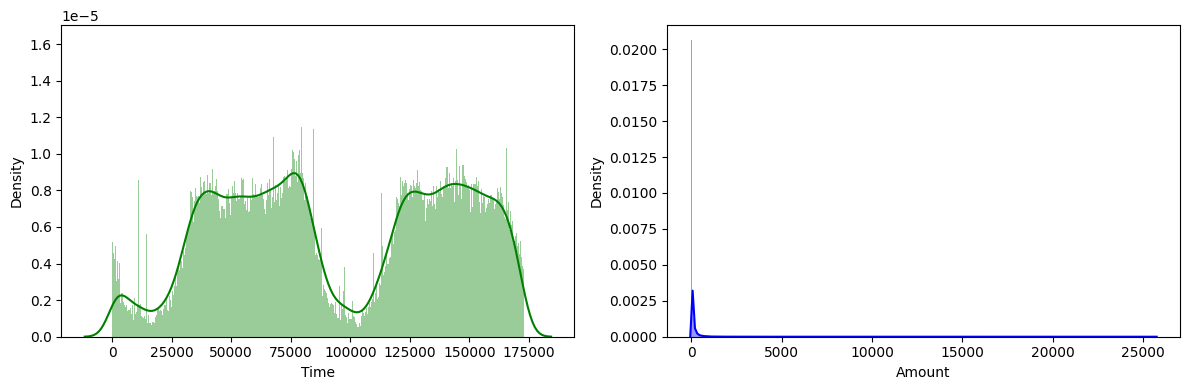

In [13]:
print('\033[1m Normal Numeric Features Distribution'.center(100))
plt.figure(figsize=figsize)
for i in range(len(external_factors)):
    plt.subplot(1,n,i+1)
    sns.distplot(normal[external_factors[i]],
                 bins=1000, 
                 color = colors[i])
plt.tight_layout();

<AxesSubplot: xlabel='Time', ylabel='Amount'>

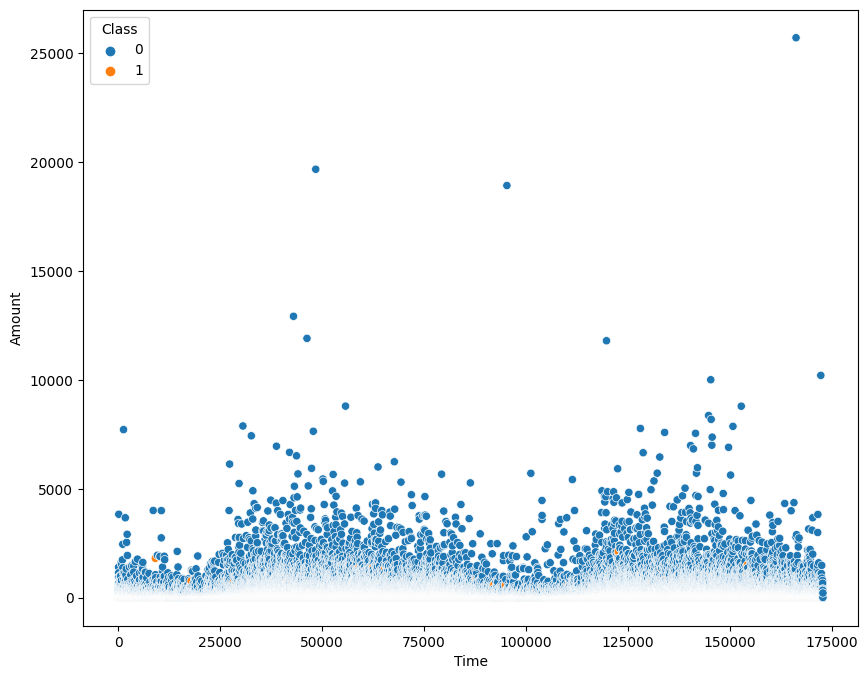

In [14]:
#plot time seris hue=class
plt.figure(figsize = (10,8))
sns.scatterplot(x = df['Time'],y = df['Amount'],hue=df['Class'])

<AxesSubplot: >

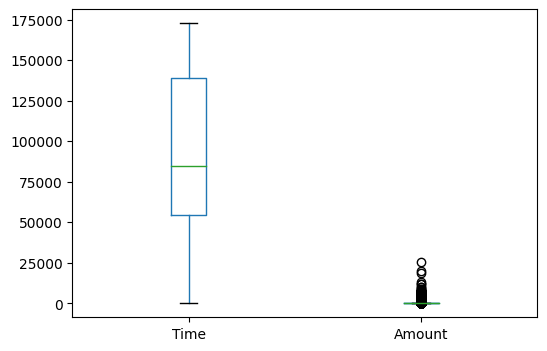

In [15]:
df.boxplot(column=external_factors, grid=False, figsize=(6,4))

<AxesSubplot: >

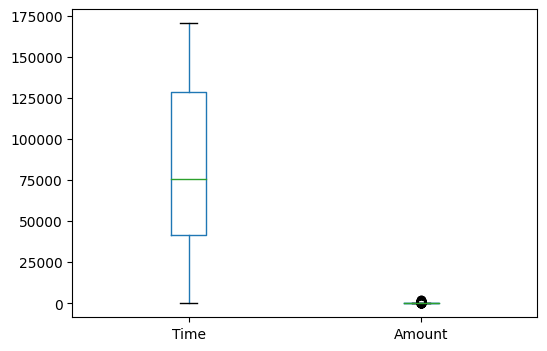

In [16]:
fraud.boxplot(column=['Time','Amount'], grid=False, figsize=(6,4))

<AxesSubplot: >

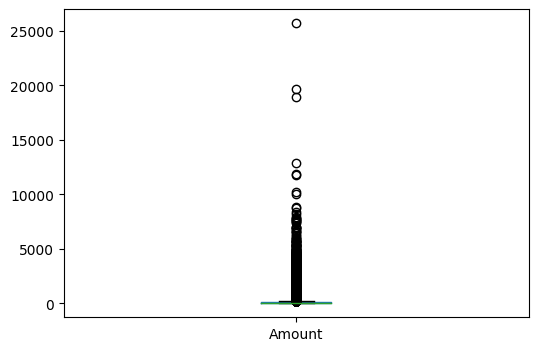

In [17]:
normal.boxplot(column=['Amount'], grid=False, figsize=(6,4))

<AxesSubplot: >

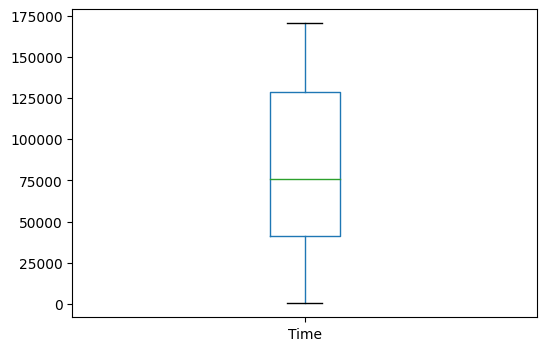

In [18]:
fraud.boxplot(column=['Time'], grid=False, figsize=(6,4))

## Split data in to X, y

In [19]:
X = df.drop(['Class'], axis=1)
y = df['Class']


In [20]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=0.2, random_state = 43)

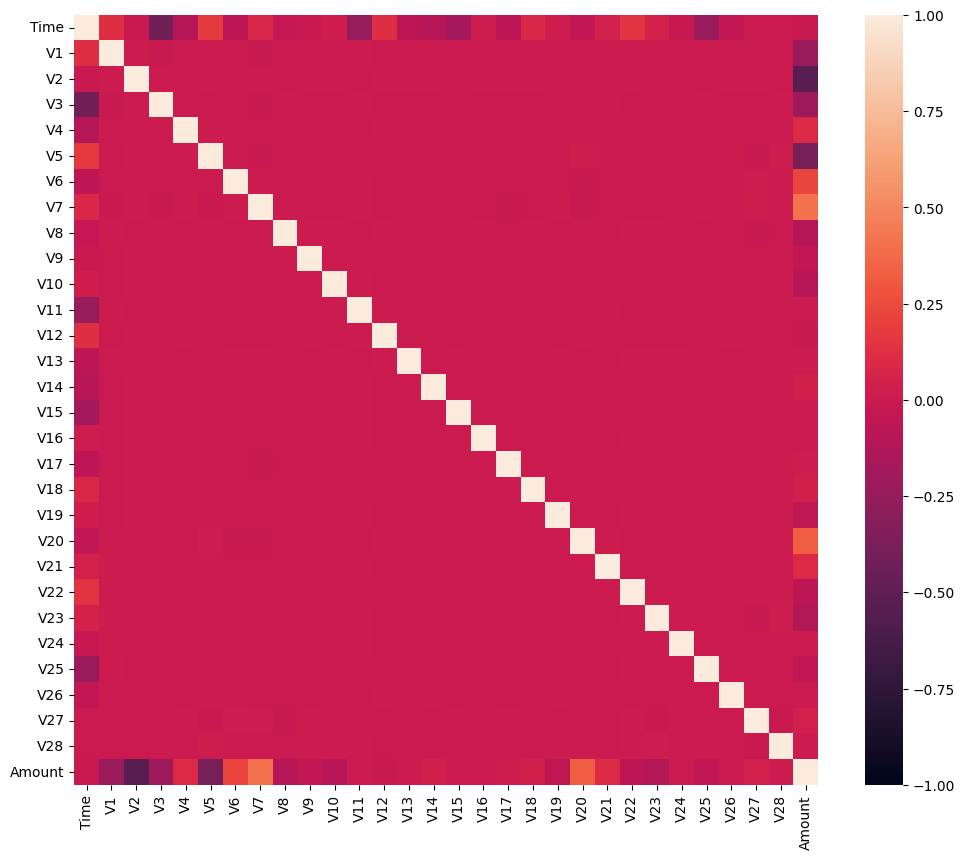

In [21]:
plt.figure(figsize=(12, 10))
cor = X_train.corr()
sns.heatmap(cor, vmin=-1, vmax=1);

## remove highly correlated data

In [22]:
keep_columns = np.full(cor.shape[0], True)
for i in range(cor.shape[0] - 1):
    for j in range(i + 1, cor.shape[0] - 1):
        if (np.abs(cor.iloc[i, j]) >= 0.8): # 0.8 is the correlation threshold
            keep_columns[j] = False
selected_columns = X_train.columns[keep_columns]
X_train_reduced = X_train[selected_columns]

In [23]:
print(selected_columns)

Index(['Time', 'V1', 'V2', 'V3', 'V4', 'V5', 'V6', 'V7', 'V8', 'V9', 'V10',
       'V11', 'V12', 'V13', 'V14', 'V15', 'V16', 'V17', 'V18', 'V19', 'V20',
       'V21', 'V22', 'V23', 'V24', 'V25', 'V26', 'V27', 'V28', 'Amount'],
      dtype='object')


In [24]:
selected_columns==X.columns

array([ True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True])

### check multicollinearity:
* Is one feature linearly correlated with multiple variables instead of two variables only?
* Here, we can apply VIF (Variable Inflation Factors). 
” VIF determines the strength of the correlation between the independent variables. It is predicted by taking a variable and regressing it against every other variable. “
* VIF starts at 1 and has no upper limit
* VIF = 1, no correlation between the independent variable and the other variables
* VIF exceeding 5 or 10 indicates high multicollinearity between this independent variable and the others

In [26]:
# Import library for VIF
from statsmodels.stats.outliers_influence import variance_inflation_factor

def calc_vif(X):

    # Calculating VIF
    vif = pd.DataFrame()
    vif["variables"] = X.columns
    vif["VIF"] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]

    return(vif)

In [27]:
X = X_train.iloc[:,:-1]
calc_vif(X)

,variables,VIF
0,Time,1.104114
1,V1,1.003412
2,V2,1.000247
3,V3,1.039151
4,V4,1.002545
5,V5,1.007390
6,V6,1.001163
7,V7,1.002759
8,V8,1.000524
9,V9,1.000101


Since all VIF values are close to 1, there are no multicollinearity.

# Basic model selection
## Make a pipeline to scale data.
## Choose different models: Logistic Regression, SVM, Random Forest, Gradient Boost, XGBoost classifiers;  train the model and compare their performance.
## Performance evaluation with Confusion matrix, accuracy, precision, recall, and F1 score.



In [45]:
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score, roc_curve,RocCurveDisplay
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from xgboost import XGBClassifier
from sklearn.svm import SVC



In [46]:
rf = RandomForestClassifier(random_state=42,class_weight='balanced')
lr = LogisticRegression(max_iter=100000, class_weight="balanced",random_state=42)
xg = XGBClassifier(random_state=42,class_weight='balanced')
#svc = SVC(random_state=42)


In [57]:
from sklearn import metrics
# Function to print the accuracy and classification report
def print_acc_and_CR(y_test, model_predictions):
    # Calculate and display the model accuracy
    print('Accuracy: {:.2f}%'.format(accuracy_score(y_test, model_predictions) * 100))
    # Calculate and display the classification report for the model
    print('Classification report: \n', classification_report(y_test, model_predictions))
# Function to display the confusion matrix
def display_confusion_matrix(y_test, model_predictions):
    # Calculate and display the confusion matrix
    model_confusionMatrix = confusion_matrix(y_test, model_predictions)
    # Create variables that will be displayed as text on the plot
    strings2 = np.asarray([['True Negatives \n', 'False Positives \n'], ['False Negatives \n', 'True Positives \n']])
    labels2 = (np.asarray(["{0} {1:g}".format(string, value)
                          for string, value in zip(strings2.flatten(),model_confusionMatrix.flatten())])
             ).reshape(2, 2)
    # Use a heat map plot to display the results
    sns.heatmap(model_confusionMatrix, annot=labels2, fmt='', vmin=0, annot_kws={"fontsize":17})
    plt.xlabel('Predicted value');
    plt.ylabel('Actual value');
    plt.show()

def report_score(scores, model, y_test, y_pred,auc):
    scores['model'].append(c) 
    scores['accuracy'].append(metrics.accuracy_score(y_test, y_pred)) 
    scores['precision'].append(metrics.precision_score(y_test, y_pred))
    scores['recall'].append(metrics.recall_score(y_test, y_pred))
    scores['f1_score'].append(metrics.f1_score(y_test, y_pred))
    scores['ROC'].append(auc)
    return scores

In [58]:
# grid search class weights with svm for imbalance classification
from numpy import mean
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import RepeatedStratifiedKFold

def modelSearch(model, X, y):
    # define grid
    balance = [{0:100,1:1}, {0:10,1:1}, {0:1,1:1}, {0:1,1:10}, {0:1,1:100}]
    param_grid = dict(class_weight=balance)
    # define evaluation procedure
    cv = RepeatedStratifiedKFold(n_splits=10, n_repeats=3, random_state=1)
    # define grid search
    grid = GridSearchCV(estimator=model, param_grid=param_grid, n_jobs=-1, cv=cv, scoring='roc_auc')
    # execute the grid search
    grid_result = grid.fit(X, y)
    # report the best configuration
    print("Best: %f using %s" % (grid_result.best_score_, grid_result.best_params_))
    # report all configurations
    means = grid_result.cv_results_['mean_test_score']
    stds = grid_result.cv_results_['std_test_score']
    params = grid_result.cv_results_['params']
    for mean, stdev, param in zip(means, stds, params):
        print("%f (%f) with: %r" % (mean, stdev, param))

## The cross validation and grid search for svm took 110m. Apparently, the class_weight of 1:100 gets the best result.

In [59]:
#modelSearch(svc, X_train_reduced, y_train)

In [60]:
svc = SVC(class_weight={0: 1, 1: 100})
svc2= SVC(class_weight='balanced')
clf_list = [lr,svc,svc2]

***************Model************ LogisticRegression(class_weight='balanced', max_iter=100000, random_state=42)
Accuracy: 97.77%
Classification report: 
               precision    recall  f1-score   support

           0       1.00      0.98      0.99     56856
           1       0.07      0.91      0.13       106

    accuracy                           0.98     56962
   macro avg       0.54      0.94      0.56     56962
weighted avg       1.00      0.98      0.99     56962



/Users/michael/opt/anaconda3/envs/anomaly/lib/python3.9/site-packages/sklearn/base.py:443: UserWarning: X has feature names, but LogisticRegression was fitted without feature names
  warnings.warn(


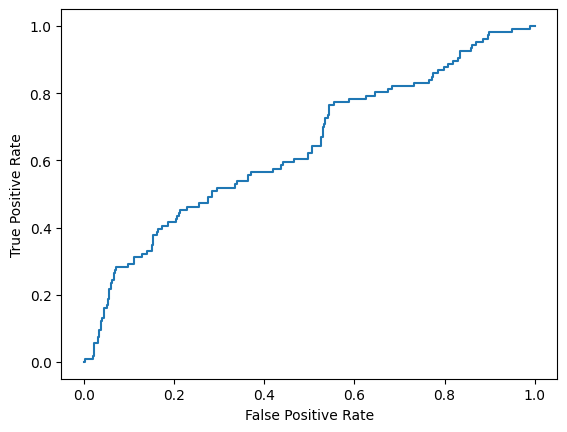

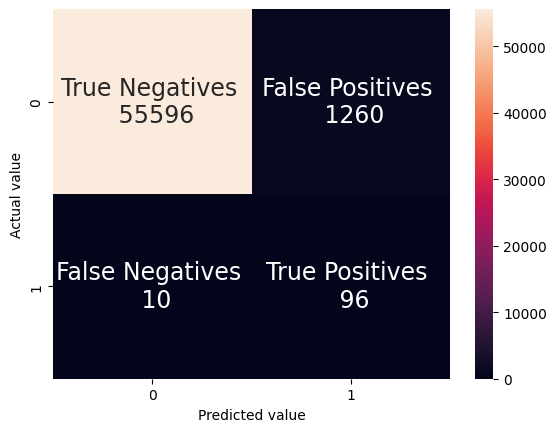

***************Model************ SVC(class_weight={0: 1, 1: 100})
Accuracy: 99.84%
Classification report: 
               precision    recall  f1-score   support

           0       1.00      1.00      1.00     56856
           1       0.56      0.75      0.64       106

    accuracy                           1.00     56962
   macro avg       0.78      0.87      0.82     56962
weighted avg       1.00      1.00      1.00     56962



/Users/michael/opt/anaconda3/envs/anomaly/lib/python3.9/site-packages/sklearn/base.py:443: UserWarning: X has feature names, but SVC was fitted without feature names
  warnings.warn(


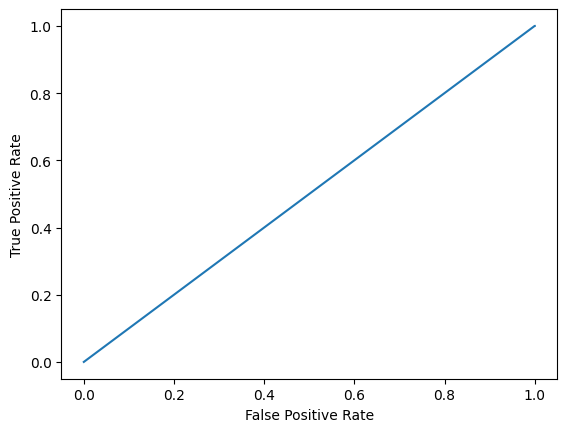

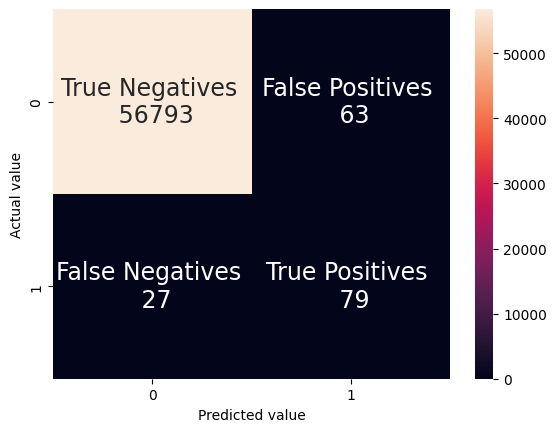

***************Model************ SVC(class_weight='balanced')
Accuracy: 99.68%
Classification report: 
               precision    recall  f1-score   support

           0       1.00      1.00      1.00     56856
           1       0.34      0.75      0.47       106

    accuracy                           1.00     56962
   macro avg       0.67      0.88      0.73     56962
weighted avg       1.00      1.00      1.00     56962



/Users/michael/opt/anaconda3/envs/anomaly/lib/python3.9/site-packages/sklearn/base.py:443: UserWarning: X has feature names, but SVC was fitted without feature names
  warnings.warn(


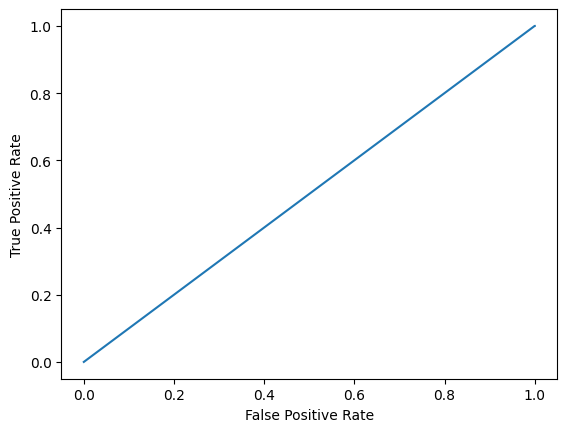

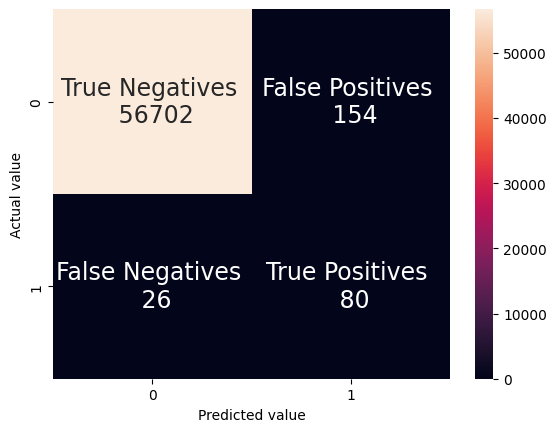

In [61]:

scores={'model':[],'accuracy':[], 'precision':[], 'recall':[], 'f1_score':[],'ROC':[]}
for c in clf_list:
    clf = make_pipeline(StandardScaler(), c)
    clf.fit(X_train_reduced, y_train)
    y_pred = clf.predict(X_test)
 
    #return pd.DataFrame(
    #    scores, columns=["acc", "recall", "precision", "f1"], index=["lr", "svc", "xgb"]
    print("***************Model************", c)
    print_acc_and_CR(y_test, y_pred)
    y_score = c.decision_function(X_test)
    auc = metrics.roc_auc_score(y_test, y_score)
    fpr, tpr, thresholds = roc_curve(y_test, y_score, pos_label=c.classes_[1])

    roc_display = RocCurveDisplay(fpr=fpr, tpr=tpr).plot()
    plt.show()

    display_confusion_matrix(y_test, y_pred)
    scores = report_score(scores, c, y_test, y_pred,auc)
    #print ('ROC': y_score)


## SVM and logistic regression. Accuracy of SVM is higher than logistic regression. However, the recall of fraud activity is lower. In this case it is 0.75 comparing with 0.91. With default 'balanced class weight' there is only one case change.

***************Model************ RandomForestClassifier(class_weight='balanced', random_state=42)
Accuracy: 99.94%
Classification report: 
               precision    recall  f1-score   support

           0       1.00      1.00      1.00     56856
           1       0.93      0.75      0.83       106

    accuracy                           1.00     56962
   macro avg       0.96      0.87      0.91     56962
weighted avg       1.00      1.00      1.00     56962



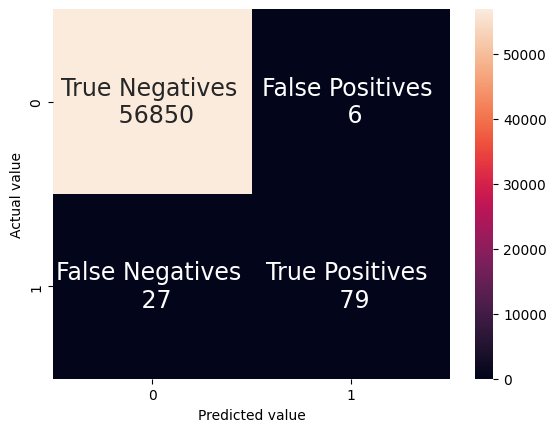

[16:45:30] WARNING: /Users/runner/work/xgboost/xgboost/python-package/build/temp.macosx-10.9-x86_64-cpython-37/xgboost/src/learner.cc:627: 
Parameters: { "class_weight" } might not be used.

  This could be a false alarm, with some parameters getting used by language bindings but
  then being mistakenly passed down to XGBoost core, or some parameter actually being used
  but getting flagged wrongly here. Please open an issue if you find any such cases.


***************Model************ XGBClassifier(base_score=0.5, booster='gbtree', callbacks=None,
              class_weight='balanced', colsample_bylevel=1, colsample_bynode=1,
              colsample_bytree=1, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, gamma=0, gpu_id=-1,
              grow_policy='depthwise', importance_type=None,
              interaction_constraints='', learning_rate=0.300000012,
              max_bin=256, max_cat_to_onehot=4, max_delta_step=0, max_depth=6,
              m

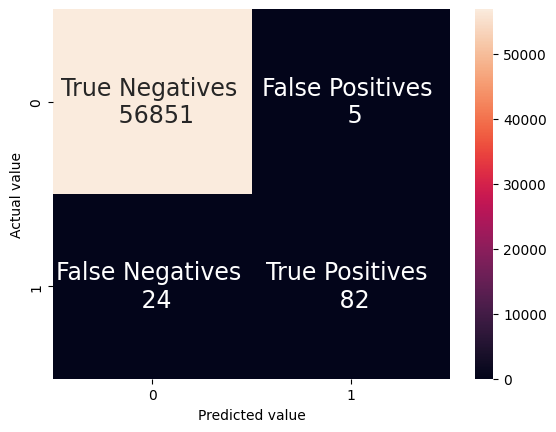

In [62]:
tree_list = [rf, xg]
for c in tree_list:
    clf = make_pipeline(StandardScaler(), c)
    clf.fit(X_train_reduced, y_train)
    y_pred = clf.predict(X_test)
    
    print("***************Model************", c)
    print_acc_and_CR(y_test, y_pred)

    display_confusion_matrix(y_test, y_pred)
    scores = report_score(scores, c, y_test, y_pred,auc=None)

## Performance of Tree based method doesn't exceed logistic regression or SVM in terms of class 1 recall. In terms of f1 score, which is contributed by precision, class 0 prediction has been significantly improved with XGboost model. The precision reached 94% which will give less false alarms.

Feature ranking:
1. V14 (feature 14) (0.188136)
2. V10 (feature 10) (0.107548)
3. V12 (feature 12) (0.102501)
4. V17 (feature 17) (0.095119)
5. V4 (feature 4) (0.090021)
6. V3 (feature 3) (0.057173)
7. V16 (feature 16) (0.056910)
8. V11 (feature 11) (0.049281)
9. V2 (feature 2) (0.033750)
10. V9 (feature 9) (0.024354)
11. V7 (feature 7) (0.023496)
12. V21 (feature 21) (0.020894)
13. Amount (feature 29) (0.013154)
14. V18 (feature 18) (0.011662)
15. V8 (feature 8) (0.010725)
16. V19 (feature 19) (0.010383)
17. V5 (feature 5) (0.010119)
18. V20 (feature 20) (0.009784)
19. V27 (feature 27) (0.009046)
20. V13 (feature 13) (0.008504)


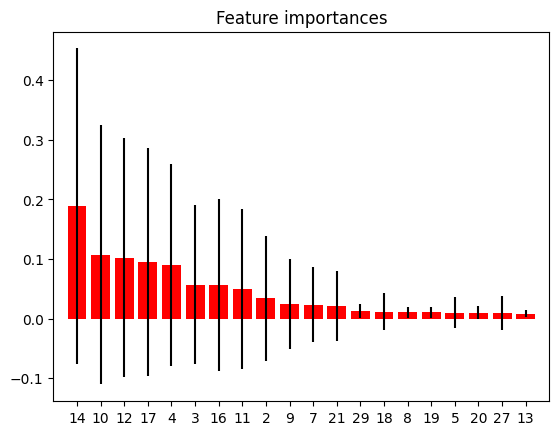

In [63]:
# Set a number of features to consider when looking at rank/importance
n_features = 20

# Use Random Forest to get feature ranks/importances for each feature
importances = rf.feature_importances_
std = np.std([tree.feature_importances_ for tree in rf.estimators_],
             axis=0)
indices = np.argsort(importances)[::-1]

# Print the feature ranking
print("Feature ranking:")

# Look at importance for first 20 features
for f in range(n_features):#range(X_train_reduced.shape[1]):
    print("%d. %s (feature %d) (%f)" %
          (f + 1, X_train_reduced.columns[indices[f]], indices[f], importances[indices[f]]))

# Plot the impurity-based feature importances of the forest
plt.figure()
plt.title("Feature importances")
plt.bar(range(n_features), importances[indices[:n_features]],
        color="r", yerr=std[indices[:n_features]], align="center")
plt.xticks(range(n_features), indices[:n_features])
plt.xlim([-1, n_features]);

## XGBoost showed the best precision and recall. 

In [64]:
score_df = pd.DataFrame(scores)
score_df.to_csv('../Data/MachineLearningSummary.csv')
print(score_df)

                                               model  accuracy  precision  \
0  LogisticRegression(class_weight='balanced', ma...  0.977704   0.070796   
1                   SVC(class_weight={0: 1, 1: 100})  0.998420   0.556338   
2                       SVC(class_weight='balanced')  0.996840   0.341880   
3  (DecisionTreeClassifier(max_features='sqrt', r...  0.999421   0.929412   
4  XGBClassifier(base_score=0.5, booster='gbtree'...  0.999491   0.942529   

     recall  f1_score       ROC  
0  0.905660  0.131327  0.638492  
1  0.745283  0.637097  0.500053  
2  0.754717  0.470588  0.500053  
3  0.745283  0.827225       NaN  
4  0.773585  0.849741       NaN  


## Use autoML to find an optimized model

In [ ]:
from supervised.automl import AutoML
automl = AutoML(algorithms=['LightGBM','Xgboost','Random Forest','Neural Network'], 
                train_ensemble=False, explain_level=2)
automl.fit(X_train_reduced, y_train)